In [1]:
# Import libraries needed in this research
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from pylab import figure, axes, pie, title, savefig

from scipy.linalg import lstsq
import timeit

In [2]:
# I will need to define a function to get number of patents applied for in year n and 
# awarded by the end of year n+10

def get_citation_ratio(year1, year2, Frame, withRangeX, withRangeY):

#     countAbove = 0
    
#     countBelow = 0
    
#     #print Frame.head(10)  
#     print Frame.shape
    
#     temporaryNumber = 100000
    
#     for index, row in Frame.head(temporaryNumber).iterrows():
        
#         if row['issue_year_x'] >= year1 and row['issue_year_x'] <= year2 and row ['issue_year_y'] <= (row['issue_year_x']+withRangeX):
        
#             countAbove = countAbove+1
                       
      
#         if row['issue_year_x'] >= year1 and row['issue_year_x'] <= year2 and row ['issue_year_y'] <= (row['issue_year_x']+withRangeY):
        
#             countBelow = countBelow+1
            
# #         if row['issue_year_x'] >= year1 and row['issue_year_x'] <= year2 and \
# #         row ['issue_year_y'] <= (row['issue_year_x']+withRangeX) and \
# #         row ['issue_year_y'] > (row['issue_year_x']+withRangeY):
        
            
            
# #             print row
            
#     print countAbove
#     print countBelow
    
#     ratio = float(countAbove)/float(countBelow)
    
    
#     Frame = Frame.head(temporaryNumber)
    
    
#     selectedFrameAbove = Frame.loc[(Frame['issue_year_x'] >= year1) &(Frame['issue_year_x'] <= year2) & (Frame['issue_year_y']<=(Frame['issue_year_x']+withRangeX))]
#     print "selectedFrameAbove"
#     print selectedFrameAbove.shape[0]
    
    
#     selectedFrameBelow = Frame.loc[(Frame['issue_year_x'] >= year1) &(Frame['issue_year_x'] <= year2) & (Frame['issue_year_y']<=(Frame['issue_year_x']+withRangeY))]
#     print "selectedFrameBelow"
#     print selectedFrameBelow.shape[0]

    selectedFrameAbove = Frame.loc[(Frame['filed_year_x'] >= year1) &(Frame['filed_year_x'] <= year2) & (Frame['filed_year_y']<=(Frame['filed_year_x']+withRangeX))]
    print "selectedFrameAbove"
    print selectedFrameAbove.shape[0]
    
    
    selectedFrameBelow = Frame.loc[(Frame['filed_year_x'] >= year1) &(Frame['filed_year_x'] <= year2) & (Frame['filed_year_y']<=(Frame['filed_year_x']+withRangeY))]
    print "selectedFrameBelow"
    print selectedFrameBelow.shape[0]


    
    ratio = float(selectedFrameAbove.shape[0])/float(selectedFrameBelow.shape[0])
    
    return ratio



In [3]:
np.random.seed(0)

In [4]:
# def Cite_Over_Gap(cite, PatDate, gaps):
#     temp = pd.merge(cite, PatDate, how="left", on="wku")
#     temp = pd.merge(temp, PatDate, how="left", left_on="citing", right_on="wku")
#     outputs = temp[(temp.filed_year_y-temp.filed_year_x<=gaps)& \
#                    (temp.filed_year_y-temp.filed_year_x>=0)][["wku_x","citing","filed_year_x"]]
#     outputs.columns = ["wku","citing","filed_year"]
#     outputs=outputs.groupby(["wku","filed_year"], as_index=False).count()
#     return outputs

In [5]:
# cross validations to find the ideal parameter for C and epsilon
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    epsilons = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'epsilon' : epsilons}
    grid_search = GridSearchCV(LinearSVR(fit_intercept=False), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [6]:
# Read NBER(2006) patent data and updated_patent_data generated from Patent prediction code
CitationInfo = pd.read_stata("nber data/3930271_7155745_citation.dta")
YearInfo     = pd.read_stata("nber data/3930271_7155745_date.dta")
###Read Prof.Amit's file to keep the result constant.
###This could be replace with Linear SVR output from patent prediction code.
# PatInfo = pd.read_csv("updated_patent_data.csv") 
PatInfo = pd.read_csv("updated_patent_data_Amit.csv") 


In [7]:
# Create 8 lag variable for file year/class/patent id/firm id
PatInfo = PatInfo.sort_values(["gvkey","cat_code","filed_year"])
for i in range(1,8):
    PatInfo["filed_year_"+str(i)] = PatInfo["filed_year"].shift(i)
    PatInfo["cat_code_"+str(i)] = PatInfo["cat_code"].shift(i)
    PatInfo["wku_"+str(i)] = PatInfo["wku"].shift(i)
    PatInfo["gvkey_"+str(i)] = PatInfo["gvkey"].shift(i)
print PatInfo.head(30)

        gvkey  filed_year  cat_code  wku  filed_year_1  cat_code_1  wku_1  \
0        1004        1976         1  0.0           NaN         NaN    NaN   
1        1004        1977         1  0.0        1976.0         1.0    0.0   
2        1004        1978         1  0.0        1977.0         1.0    0.0   
3        1004        1979         1  0.0        1978.0         1.0    0.0   
4        1004        1980         1  0.0        1979.0         1.0    0.0   
5        1004        1981         1  0.0        1980.0         1.0    0.0   
6        1004        1982         1  0.0        1981.0         1.0    0.0   
7        1004        1983         1  0.0        1982.0         1.0    0.0   
8        1004        1984         1  0.0        1983.0         1.0    0.0   
9        1004        1985         1  1.0        1984.0         1.0    0.0   
10       1004        1986         1  0.0        1985.0         1.0    1.0   
11       1004        1987         1  0.0        1986.0         1.0    0.0   

In [8]:
# The and operation applied here is tring to make sure each record/row have no Nah values,
# which means to make sure the input feature matrix for the later prediction has no Nahs.
PatInfo = PatInfo[(PatInfo.gvkey==PatInfo.gvkey_1)& \
                                                  (PatInfo.gvkey==PatInfo.gvkey_2)& \
                                                  (PatInfo.gvkey==PatInfo.gvkey_3)& \
                                                  (PatInfo.gvkey==PatInfo.gvkey_4)& \
                                                  (PatInfo.gvkey==PatInfo.gvkey_5)& \
                                                  (PatInfo.gvkey==PatInfo.gvkey_6)& \
                                                  (PatInfo.gvkey==PatInfo.gvkey_7)& \
                                                  (PatInfo.cat_code==PatInfo.cat_code_1)& \
                                                  (PatInfo.cat_code==PatInfo.cat_code_2)& \
                                                  (PatInfo.cat_code==PatInfo.cat_code_3)& \
                                                  (PatInfo.cat_code==PatInfo.cat_code_4)& \
                                                  (PatInfo.cat_code==PatInfo.cat_code_5)& \
                                                  (PatInfo.cat_code==PatInfo.cat_code_6)& \
                                                  (PatInfo.cat_code==PatInfo.cat_code_7)& \
                                                  (PatInfo.filed_year==PatInfo.filed_year_1+1)& \
                                                  (PatInfo.filed_year==PatInfo.filed_year_2+2)& \
                                                  (PatInfo.filed_year==PatInfo.filed_year_3+3)& \
                                                  (PatInfo.filed_year==PatInfo.filed_year_4+4)& \
                                                  (PatInfo.filed_year==PatInfo.filed_year_5+5)& \
                                                  (PatInfo.filed_year==PatInfo.filed_year_6+6)& \
                                                  (PatInfo.filed_year==PatInfo.filed_year_7+7)]

print PatInfo.head(10)

In [9]:
# we only use the former six year's wku information. Here we select them.
PatInfo_final = PatInfo[["gvkey","filed_year","cat_code","wku","wku_1","wku_2","wku_3","wku_4","wku_5","wku_6"]]

In [10]:
#print PatInfo_final.head(10)

In [11]:
# Here we get PatInfo_final_cites(A)
PatInfo_final_cites = PatInfo_final
#print PatInfo_final_cites.shape

In [12]:
# Here initialize the merge of the citationInfo and YearInfo to get CitationInfo_date_agg (B)
CitationInfo_date = pd.merge(CitationInfo, YearInfo[["wku","filed_year","issue_year"]], how="left", on="wku") 
CitationInfo_date = pd.merge(CitationInfo_date , YearInfo[["wku","filed_year","issue_year"]], how="left", left_on="citing", right_on="wku")
print CitationInfo_date.head(10)


start = timeit.default_timer()
Year1993Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 13)
Year1994Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 12)
Year1995Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 11)
Year1996Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 10)
Year1997Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 9)
Year1998Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 8)
Year1999Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 7)
Year2000Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 6)
Year2001Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 5)
Year2002Ratio = get_citation_ratio(1976, 1992, CitationInfo_date, 14, 4)
#Year2002Ratio=Year2001Ratio
stop = timeit.default_timer()

print ('Time: ', stop - start)

print Year1993Ratio
print Year1994Ratio
print Year1995Ratio
print Year1996Ratio
print Year1997Ratio
print Year1998Ratio
print Year1999Ratio
print Year2000Ratio
print Year2001Ratio
print Year2002Ratio



     wku_x   citing  filed_year_x  issue_year_x    wku_y  filed_year_y  \
0  3930271  5135226          1974          1976  5135226          1991   
1  4025077  5135226          1976          1977  5135226          1991   
2  4062540  5135226          1976          1977  5135226          1991   
3  4590625  5135226          1985          1986  5135226          1991   
4  4796302  5135226          1987          1989  5135226          1991   
5  4892315  5135226          1988          1990  5135226          1991   
6  3930271  5592695          1974          1976  5592695          1996   
7  4000903  5592695          1975          1977  5592695          1996   
8  4329741  5592695          1980          1982  5592695          1996   
9  4665565  5592695          1986          1987  5592695          1996   

   issue_year_y  
0          1992  
1          1992  
2          1992  
3          1992  
4          1992  
5          1992  
6          1997  
7          1997  
8          1997  
9    

In [13]:
CitationInfo_date["gap"] = CitationInfo_date.filed_year_y - CitationInfo_date.filed_year_x

In [14]:
CitationInfo_date = CitationInfo_date[CitationInfo_date.gap>=0]

In [15]:
CitationInfo_date = CitationInfo_date[["wku_x", "citing", "filed_year_x", "gap"]]

In [16]:
CitationInfo_date.columns = ["wku","citing","filed_year","gap"]

In [17]:
CitationInfo_date_agg = CitationInfo_date.groupby(["wku","filed_year","gap"], as_index=False).count()

In [18]:
# Delete some stored Panda frames to release memories.
lst = [CitationInfo, YearInfo, CitationInfo_date]
del lst
#print CitationInfo_date_agg.head(30)
#CitationInfo_date_agg.info()

In [19]:
## We read FrimInfo and classinfo, then merge citatioInfo_data_agg (B) into it.
FirmInfo     = pd.read_stata("nber data/NBER_US_public_firm_assignee.dta")
ClassInfo    = pd.read_stata("nber data/3930271_8341762_class.dta")

In [20]:
FirmInfo_class = pd.merge(FirmInfo, ClassInfo[["wku","cat_code"]], how="left", on="wku").dropna()

In [21]:
FirmInfo_class_cite = pd.merge(FirmInfo_class, CitationInfo_date_agg[["wku","gap","citing"]], how="left", on="wku").fillna(0)

In [22]:
FirmInfo_class_cite_agg = FirmInfo_class_cite[(FirmInfo_class_cite.filed_year>=1976)][["gvkey","filed_year","cat_code","gap","citing"]].groupby(["gvkey","filed_year","cat_code","gap"], as_index=False).sum()

In [23]:
# Set up the prediction horizon for citation
FirmInfo_class_cite_agg_h = FirmInfo_class_cite_agg[FirmInfo_class_cite_agg.gap<=10][["gvkey","filed_year","cat_code","citing"]].groupby(["gvkey","filed_year","cat_code"], as_index=False).sum()

In [24]:
lst2 = [FirmInfo,ClassInfo, FirmInfo_class, FirmInfo_class_cite, FirmInfo_class_cite_agg]
del lst2

In [25]:
# Now we did the final merge, merge the FirmInfo_class_cite_agg_h with PatInfo_final_cites(A)
FirmInfo_class_cite_pat_agg = pd.merge(PatInfo_final_cites, FirmInfo_class_cite_agg_h, how="left", on=["gvkey","filed_year","cat_code"]).fillna(0)

In [26]:
# create a six column feature matrix in cat_code. This step is used to transform the cat_code.
DummyCat  = pd.get_dummies(FirmInfo_class_cite_pat_agg.cat_code)

In [27]:
ML_input = pd.concat([FirmInfo_class_cite_pat_agg, DummyCat], axis=1)

In [28]:
ML_input.columns


Index([     u'gvkey', u'filed_year',   u'cat_code',        u'wku',
            u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
            u'wku_5',      u'wku_6',     u'citing',             1,
                   2,             3,             4,             5,
                   6],
      dtype='object')

In [29]:
# ML_input.columns= [     u'gvkey', u'filed_year',   u'cat_code',        u'wku',
#             u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
#             u'wku_5',        u'wku_6',     u'citing',     u'logciting',           "cat_code1",
#                  "cat_code2",           "cat_code3",           "cat_code4",           "cat_code5",
#                  "cat_code6"]
ML_input.columns= [     u'gvkey', u'filed_year',   u'cat_code',        u'wku',
            u'wku_1',      u'wku_2',      u'wku_3',      u'wku_4',
            u'wku_5',        u'wku_6',     u'citing',           "cat_code1",
                 "cat_code2",           "cat_code3",           "cat_code4",           "cat_code5",
                 "cat_code6"]

In [30]:
#print ML_input.head(20)

In [31]:
# Here we include additional features calculated by another source.

#print ML_input.shape
AddionalFeatures = pd.read_csv("regressions/firm characters/TEMP1.csv")
AddionalFeatures.rename(columns={'year':'filed_year'}, inplace=True)
#print AddionalFeatures.head(10)
ML_input_withAdditional = pd.merge(ML_input, AddionalFeatures, how="left", on=["gvkey","filed_year"]).fillna(0)
#print ML_input_withAdditional.shape
#print ML_input_withAdditional.head(10)
#ML_input_withAdditional.to_csv('temp.csv',index=False)

ML_input=ML_input_withAdditional

In [32]:
# Set up the year since when to apply the prediction
syear = 1992
# ML_input_train = ML_input[(ML_input.filed_year<=syear)&(ML_input.filed_year>=1980)]
ML_input_train = ML_input[(ML_input.filed_year<=syear)]
ML_input_pred = ML_input[(ML_input.filed_year>syear)&(ML_input.filed_year<=2002)]

print ML_input_train.head(10)
print ML_input_pred.head(10)

   gvkey  filed_year  cat_code  wku  wku_1  wku_2  wku_3  wku_4  wku_5  wku_6  \
0   1004        1983         1  0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1   1004        1984         1  0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2   1004        1985         1  1.0    0.0    0.0    0.0    0.0    0.0    0.0   
3   1004        1986         1  0.0    1.0    0.0    0.0    0.0    0.0    0.0   
4   1004        1987         1  0.0    0.0    1.0    0.0    0.0    0.0    0.0   
5   1004        1988         1  0.0    0.0    0.0    1.0    0.0    0.0    0.0   
6   1004        1989         1  0.0    0.0    0.0    0.0    1.0    0.0    0.0   
7   1004        1990         1  0.0    0.0    0.0    0.0    0.0    1.0    0.0   
8   1004        1991         1  0.0    0.0    0.0    0.0    0.0    0.0    1.0   
9   1004        1992         1  0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   ...  cat_code6  w_cash2asset  w_rd2sale  w_M2B  w_LOG_SIZE  w_roa  w_lev  \
0  ...          0           0

In [33]:
# ## No additional features

# ML_input_trainX = ML_input_train[["wku","wku_1","wku_2","wku_3","wku_4","wku_5","wku_6","cat_code1","cat_code2","cat_code3","cat_code4","cat_code5","cat_code6"]].values
# ML_input_trainY = ML_input_train[["citing"]].values

# ML_input_predX = ML_input_pred[["wku","wku_1","wku_2","wku_3","wku_4","wku_5","wku_6","cat_code1","cat_code2","cat_code3","cat_code4","cat_code5","cat_code6"]].values

In [34]:
ML_input_trainX = ML_input_train[["wku","wku_1","wku_2","wku_3","wku_4","wku_5","wku_6","cat_code1","cat_code2","cat_code3","cat_code4","cat_code5","cat_code6","w_cash2asset","w_rd2sale","w_M2B","w_LOG_SIZE","w_roa","w_lev","w_spread","log_state_patents","log_class_patents"
]].values
ML_input_trainY = ML_input_train[["citing"]].values

ML_input_predX = ML_input_pred[["wku","wku_1","wku_2","wku_3","wku_4","wku_5","wku_6","cat_code1","cat_code2","cat_code3","cat_code4","cat_code5","cat_code6","w_cash2asset","w_rd2sale","w_M2B","w_LOG_SIZE","w_roa","w_lev","w_spread","log_state_patents","log_class_patents"
]].values

#print ML_input_trainX.shape
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
SelectModel = SelectKBest(f_classif, k='all')
#SelectModel = SelectKBest(f_classif, k=10)
ML_input_trainX = SelectModel.fit_transform(ML_input_trainX, ML_input_trainY)
ML_input_predX = SelectModel.transform(ML_input_predX)
#print ML_input_trainX.head(20)

##Get Selected Features
feature_names = ["wku","wku_1","wku_2","wku_3","wku_4","wku_5","wku_6","cat_code1","cat_code2","cat_code3","cat_code4","cat_code5","cat_code6","w_cash2asset","w_rd2sale","w_M2B","w_LOG_SIZE","w_roa","w_lev","w_spread","log_state_patents","log_class_patents"]
mask = SelectModel.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
print new_features

/home/yuansun/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['wku', 'wku_1', 'wku_2', 'wku_3', 'wku_4', 'wku_5', 'wku_6', 'cat_code1', 'cat_code2', 'cat_code3', 'cat_code4', 'cat_code5', 'cat_code6', 'w_cash2asset', 'w_rd2sale', 'w_M2B', 'w_LOG_SIZE', 'w_roa', 'w_lev', 'w_spread', 'log_state_patents', 'log_class_patents']


In [35]:
# ML_input_trainX = ML_input_train[["wku_1","wku_2","wku_3","wku_4","wku_5","wku_6","cat_code1","cat_code2","cat_code3","cat_code4","cat_code5","cat_code6","w_cash2asset","w_rd2sale","w_M2B","w_LOG_SIZE","w_roa","w_lev","w_spread","log_state_patents","log_class_patents"
# ]].values
# ML_input_trainY = ML_input_train[["citing"]].values

# ML_input_predX = ML_input_pred[["wku_1","wku_2","wku_3","wku_4","wku_5","wku_6","cat_code1","cat_code2","cat_code3","cat_code4","cat_code5","cat_code6","w_cash2asset","w_rd2sale","w_M2B","w_LOG_SIZE","w_roa","w_lev","w_spread","log_state_patents","log_class_patents"
# ]].values

# #print ML_input_trainX.shape
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_classif
# SelectModel = SelectKBest(f_classif, k='all')
# #SelectModel = SelectKBest(f_classif, k=10)
# ML_input_trainX = SelectModel.fit_transform(ML_input_trainX, ML_input_trainY)
# ML_input_predX = SelectModel.transform(ML_input_predX)
# #print ML_input_trainX.head(20)

# ##Get Selected Features
# feature_names = ["wku_1","wku_2","wku_3","wku_4","wku_5","wku_6","cat_code1","cat_code2","cat_code3","cat_code4","cat_code5","cat_code6","w_cash2asset","w_rd2sale","w_M2B","w_LOG_SIZE","w_roa","w_lev","w_spread","log_state_patents","log_class_patents"]
# mask = SelectModel.get_support() #list of booleans
# new_features = [] # The list of your K best features

# for bool, feature in zip(mask, feature_names):
#     if bool:
#         new_features.append(feature)
# print new_features

In [36]:
#ML_input_train.filed_year.min()

In [37]:
#ML_input_train.shape

In [38]:
X = ML_input_trainX

Y = ML_input_trainY

#print ML_input_trainX
#print ML_input_trainY

In [39]:



# Linear SVM Model
# clf = LinearSVR(C = 200, epsilon = 0.01, loss="squared_epsilon_insensitive")
# clf.fit(X, Y)

### Lasso Model
# from sklearn import linear_model
# clf = linear_model.Lasso(alpha=0.1)
# clf.fit(X, Y)

### Ridge Model
# from sklearn import linear_model
# clf = linear_model.Ridge(alpha=1.0)
# clf.fit(X, Y)


#####   Neural Network Model
# from sklearn.neural_network import MLPRegressor
# clf = MLPRegressor(
#     hidden_layer_sizes=(15,),  activation='relu', solver='lbfgs', alpha=0.001, batch_size='auto',
#     learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
#     random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
#     early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08).fit(X, Y)

#### Decision Tree Model
# from sklearn import tree
# clf = tree.DecisionTreeRegressor().fit(X, Y)

# ##Logistic Regression Model (slow)
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(random_state=0, solver='newton-cg',
#                           multi_class='multinomial').fit(X, Y)

##### Random Forest Classifier Model
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators = 100,random_state=0).fit(X, Y)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [40]:
Y_pred = clf.predict(ML_input_predX)

In [41]:
# ML_input_pred["pred"] = np.exp(Y_pred+1)
ML_input_pred["pred"] = Y_pred

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
# Outputs

In [43]:
Outputs = ML_input_pred[["gvkey","filed_year","cat_code","pred"]]

In [44]:
# Outputs.to_csv("cites_pred5.csv", index=False)

In [45]:
Outputs_agg = Outputs[["gvkey","filed_year","pred"]].groupby(["gvkey","filed_year"], as_index=False).sum()

In [46]:
Outputs_agg.loc[Outputs_agg.pred<0, "pred"]=0

In [47]:
# Now we prepare the comparing dataset (NBER 2006 and our data).
FirmN_cites_agg = pd.read_csv("temp/FirmN_cites_agg_tenYear.csv")
FirmO_cites_agg = pd.read_csv("temp/FirmO_cites_agg_tenYear.csv")


FirmN_cites_agg["gvkey"] = FirmN_cites_agg["gvkey"].astype(int)
FirmN_cites_agg["filed_year"] = FirmN_cites_agg["filed_year"].astype(int)
FirmO_cites_agg["gvkey"] = FirmO_cites_agg["gvkey"].astype(int)
FirmO_cites_agg["filed_year"] = FirmO_cites_agg["filed_year"].astype(int)

In [48]:
Comp_final = pd.merge(Outputs_agg, FirmO_cites_agg, how="left", on=["gvkey","filed_year"]).fillna(0)
Comp_final = pd.merge(Comp_final, FirmN_cites_agg, how="left", on=["gvkey","filed_year"]).fillna(0)

In [49]:
print Comp_final.head(20)

    gvkey  filed_year         pred  citing_x  citing_y
0    1004        1993    19.109047      12.0      12.0
1    1004        1994     5.586667       8.0       8.0
2    1004        1995     0.000000       0.0       0.0
3    1004        1996     0.000000       0.0       0.0
4    1004        1997     4.660000       8.0       5.0
5    1004        1998     0.000000       0.0       0.0
6    1004        1999     0.000000       0.0       0.0
7    1004        2000     0.000000       0.0       0.0
8    1004        2001     9.073174       5.0       2.0
9    1004        2002     7.332202       0.0       0.0
10   1013        1993   345.550000     536.0     510.0
11   1013        1994   376.280000     392.0     307.0
12   1013        1995   187.820000     289.0     211.0
13   1013        1996   261.990000     585.0     289.0
14   1013        1997   558.080000     882.0     454.0
15   1013        1998   806.970000    1113.0     407.0
16   1013        1999  1056.461889    1761.0     449.0
17   1013 

In [50]:
print Year1993Ratio
print Year1994Ratio
print Year1995Ratio
print Year1996Ratio
print Year1997Ratio
print Year1998Ratio
print Year1999Ratio
print Year2000Ratio
print Year2001Ratio
print Year2002Ratio

for index, row in Comp_final.iterrows():

    if row['filed_year'] == 1993:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year1993Ratio
    elif row['filed_year'] == 1994:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year1994Ratio
    elif row['filed_year'] == 1995:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year1995Ratio
    elif row['filed_year'] == 1996:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year1996Ratio
    elif row['filed_year'] == 1997:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year1997Ratio
    elif row['filed_year'] == 1998:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year1998Ratio
    elif row['filed_year'] == 1999:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year1999Ratio
    elif row['filed_year'] == 2000:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year2000Ratio
    elif row['filed_year'] == 2001:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year2001Ratio
    elif row['filed_year'] == 2002:
        Comp_final.ix[index, 'citing_z'] = row['citing_y'] * Year2002Ratio
    else:
        print "Something must wrong!!!"

print Comp_final.head(20)

1.05232697828
1.12012714341
1.20907801839
1.32595707412
1.47882540075
1.67870834625
1.94773955382
2.32695030745
2.90377709516
3.86763061741


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: 


    gvkey  filed_year         pred  citing_x  citing_y    citing_z
0    1004        1993    19.109047      12.0      12.0   12.627924
1    1004        1994     5.586667       8.0       8.0    8.961017
2    1004        1995     0.000000       0.0       0.0    0.000000
3    1004        1996     0.000000       0.0       0.0    0.000000
4    1004        1997     4.660000       8.0       5.0    7.394127
5    1004        1998     0.000000       0.0       0.0    0.000000
6    1004        1999     0.000000       0.0       0.0    0.000000
7    1004        2000     0.000000       0.0       0.0    0.000000
8    1004        2001     9.073174       5.0       2.0    5.807554
9    1004        2002     7.332202       0.0       0.0    0.000000
10   1013        1993   345.550000     536.0     510.0  536.686759
11   1013        1994   376.280000     392.0     307.0  343.879033
12   1013        1995   187.820000     289.0     211.0  255.115462
13   1013        1996   261.990000     585.0     289.0  383.20

In [51]:
Comp_final['citing_Yuan'] = Comp_final[['pred','citing_z']].max(axis=1)

In [52]:
####Compare them by correlation, RMSE, MAE and R squared.

print "Prediction correlation: " 
print Comp_final["pred"].corr(Comp_final["citing_x"],method='pearson')
print "NBER 2006 correlation: "
print Comp_final["citing_y"].corr(Comp_final["citing_x"],method='pearson')
print "NBER 2006 adjusted correlation: "
print Comp_final["citing_z"].corr(Comp_final["citing_x"],method='pearson')
print "Yuan correlation: "
print Comp_final["citing_Yuan"].corr(Comp_final["citing_x"],method='pearson')
print "--------------------------------------------------------------------"

from sklearn.metrics import mean_squared_error
print "Prediction RMSE: "
print np.sqrt(mean_squared_error(Comp_final["pred"].values, Comp_final["citing_x"].values))
print "NBER 2006 RMSE: "
print np.sqrt(mean_squared_error(Comp_final["citing_y"].values,Comp_final["citing_x"].values))
print "NBER 2006 adjusted RMSE: "
print np.sqrt(mean_squared_error(Comp_final["citing_z"].values,Comp_final["citing_x"].values))
print "Yuan RMSE: "
print np.sqrt(mean_squared_error(Comp_final["citing_Yuan"].values,Comp_final["citing_x"].values))
print "--------------------------------------------------------------------"

from sklearn.metrics import mean_absolute_error
print "Prediction MAE: "
print mean_absolute_error(Comp_final["pred"].values, Comp_final["citing_x"].values)
print "NBER 2006 MAE: "
print mean_absolute_error(Comp_final["citing_y"].values, Comp_final["citing_x"].values)
print "NBER 2006 adjusted MAE: "
print mean_absolute_error(Comp_final["citing_z"].values, Comp_final["citing_x"].values)
print "Yuan MAE: "
print mean_absolute_error(Comp_final["citing_Yuan"].values, Comp_final["citing_x"].values)
print "--------------------------------------------------------------------"



from sklearn.metrics import r2_score
print "Prediction R sqaured: "
print r2_score(Comp_final["pred"].values, Comp_final["citing_x"].values)
print "NBER 2006 R sqaured: "
print r2_score(Comp_final["citing_y"].values, Comp_final["citing_x"].values)
print "NBER 2006 adjusted R sqaured: "
print r2_score(Comp_final["citing_z"].values, Comp_final["citing_x"].values)
print "Yuan R sqaured: "
print r2_score(Comp_final["citing_Yuan"].values, Comp_final["citing_x"].values)
print "--------------------------------------------------------------------"

Prediction correlation: 
0.889599260050297
NBER 2006 correlation: 
0.9003195118472921
NBER 2006 adjusted correlation: 
0.9597854940237759
Yuan correlation: 
0.9357798314900871
--------------------------------------------------------------------
Prediction RMSE: 
973.9609845189086
NBER 2006 RMSE: 
1266.4345817864776
NBER 2006 adjusted RMSE: 
818.1442227952533
Yuan RMSE: 
745.3527762647285
--------------------------------------------------------------------
Prediction MAE: 
161.90620021876717
NBER 2006 MAE: 
195.9000553097345
NBER 2006 adjusted MAE: 
127.65450918265608
Yuan MAE: 
131.54322511952955
--------------------------------------------------------------------
Prediction R sqaured: 
0.6828491971850463
NBER 2006 R sqaured: 
-0.4654414642431077
NBER 2006 adjusted R sqaured: 
0.6909739851033854
Yuan R sqaured: 
0.8481592945279656
--------------------------------------------------------------------


In [53]:
## For the plotting
Outputs_agg.columns = ["gvkey","filed_year","citing"]
Outputs_aggs = Outputs_agg.append(FirmN_cites_agg[FirmN_cites_agg.filed_year<1993])

In [54]:
comp_plots = pd.merge(Outputs_aggs, FirmN_cites_agg, how="left", on=["gvkey","filed_year"]).fillna(0)
comp_plots = pd.merge(comp_plots, FirmO_cites_agg, how="left", on=["gvkey","filed_year"]).fillna(0)

In [55]:
comp_plots_agg = comp_plots[comp_plots.filed_year>=1976][["filed_year","citing_x","citing_y","citing"]].groupby("filed_year", as_index=False).sum()

In [56]:
comp_plots_agg["bias_pred"] = comp_plots_agg.citing - comp_plots_agg.citing_x
comp_plots_agg["bias_NBER"] = comp_plots_agg.citing - comp_plots_agg.citing_y

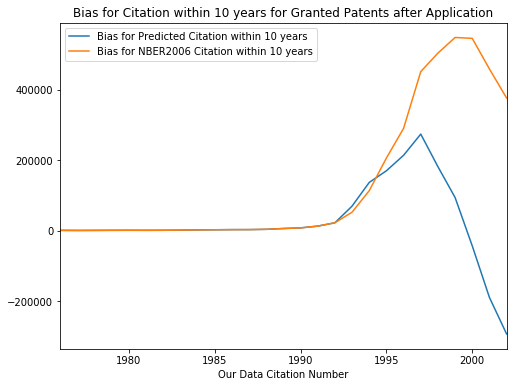

In [57]:
comp_plots_agg[["filed_year","bias_pred","bias_NBER"]].plot(x="filed_year", figsize=[8,6])
plt.legend(["Bias for Predicted Citation within 10 years", "Bias for NBER2006 Citation within 10 years"]);
plt.xlabel("Our Data Citation Number")
plt.title("Bias for Citation within 10 years for Granted Patents after Application")
savefig('ts_Pred_Our_Compare_cites10(V1).png')
plt.show()